# Decision Tree

In this chapter we will show you how to make a "Decision Tree". A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

In the example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, and registered some information about the comedian, and also registered if he/she went or not.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("decisiontreedata.csv")

In [3]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


To make a decision tree, all data has to be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

Pandas has a <b>map()</b> method that takes a dictionary with information on how to convert the values.

<b>{'UK': 0, 'USA': 1, 'N': 2}</b>

Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

In [4]:
df.head(2)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO


In [5]:
d = {"UK": 0, "USA": 1, "N": 2}
df["Nationality"] = df["Nationality"].map(d)
d = {"YES": 1, "NO": 0}
df["Go"] = df["Go"].map(d)

In [6]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


Then we have to separate the feature columns from the target column.

The feature columns are the columns that we try to predict from, and the target column is the column with the values we try to predict.

X is the feature columns, y is the target column:

In [7]:
features = ["Age", "Experience", "Rank", "Nationality"]

X = df[features]
y = df["Go"]

In [8]:
X

,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2
3,52,4,4,1
4,43,21,8,1
5,44,14,5,0
6,66,3,7,2
7,35,14,9,0
8,52,13,7,2
9,35,5,9,2


In [9]:
y

0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64

Now we can create the actual decision tree, fit it with our details. Start by importing the modules we need:

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
mtree = dtree.fit(X, y)

[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Age <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

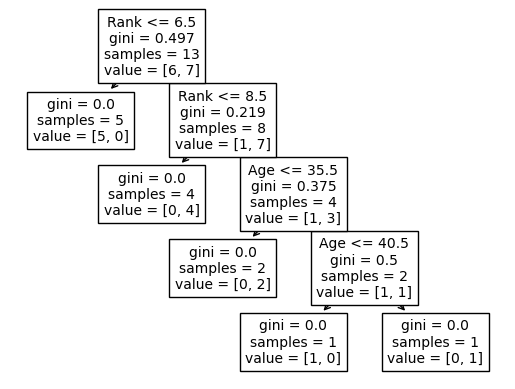

In [13]:
tree.plot_tree(mtree, feature_names = features)


Gini

There are many ways to split the samples, we use the GINI method in this tutorial.

The Gini method uses this formula:

Gini = 1 - (x/n)2 + (y/n)2

Where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this calculation:

1 - (7 / 13)2 + (6 / 13)2 = 0.497


The next step contains two boxes, one box for the comedians with a 'Rank' of 6.5 or lower, and one box with the rest.

# True - 5 Comedians End Here:

gini = 0.0 means all of the samples got the same result.

samples = 5 means that there are 5 comedians left in this branch (5 comedian with a Rank of 6.5 or lower).

value = [5, 0] means that 5 will get a "NO" and 0 will get a "GO".

# False - 8 Comedians Continue:
## Nationality

Nationality <= 0.5 means that the comedians with a nationality value of less than 0.5 will follow the arrow to the left (which means everyone from the UK, ), and the rest will follow the arrow to the right.

gini = 0.219 means that about 22% of the samples would go in one direction.

samples = 8 means that there are 8 comedians left in this branch (8 comedian with a Rank higher than 6.5).

value = [1, 7] means that of these 8 comedians, 1 will get a "NO" and 7 will get a "GO".

# True - 4 Comedians Continue:
## Age

Age <= 35.5 means that comedians at the age of 35.5 or younger will follow the arrow to the left, and the rest will follow the arrow to the right.

gini = 0.375 means that about 37,5% of the samples would go in one direction.

samples = 4 means that there are 4 comedians left in this branch (4 comedians from the UK).

value = [1, 3] means that of these 4 comedians, 1 will get a "NO" and 3 will get a "GO".
# False - 4 Comedians End Here:

gini = 0.0 means all of the samples got the same result.

samples = 4 means that there are 4 comedians left in this branch (4 comedians not from the UK).

value = [0, 4] means that of these 4 comedians, 0 will get a "NO" and 4 will get a "GO".

# True - 2 Comedians End Here:

gini = 0.0 means all of the samples got the same result.

samples = 2 means that there are 2 comedians left in this branch (2 comedians at the age 35.5 or younger).

value = [0, 2] means that of these 2 comedians, 0 will get a "NO" and 2 will get a "GO".
# False - 2 Comedians Continue:
## Experience

Experience <= 9.5 means that comedians with 9.5 years of experience, or less, will follow the arrow to the left, and the rest will follow the arrow to the right.

gini = 0.5 means that 50% of the samples would go in one direction.

samples = 2 means that there are 2 comedians left in this branch (2 comedians older than 35.5).

value = [1, 1] means that of these 2 comedians, 1 will get a "NO" and 1 will get a "GO".

# True - 1 Comedian Ends Here:

gini = 0.0 means all of the samples got the same result.

samples = 1 means that there is 1 comedian left in this branch (1 comedian with 9.5 years of experience or less).

value = [0, 1] means that 0 will get a "NO" and 1 will get a "GO".
# False - 1 Comedian Ends Here:

gini = 0.0 means all of the samples got the same result.

samples = 1 means that there is 1 comedians left in this branch (1 comedian with more than 9.5 years of experience).

value = [1, 0] means that 1 will get a "NO" and 0 will get a "GO".

# Predict Values

We can use the Decision Tree to predict new values.

Example: Should I go see a show starring a 40 years old American comedian, with 10 years of experience, and a comedy ranking of 7?

In [16]:
print(mtree.predict([[40, 10, 7, 1]]))

print("[1] means 'GO'")
print("[0] means 'NO'")

[1]
[1] means 'GO'
[0] means 'NO'


D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [17]:
 print(dtree.predict([[40, 10, 6, 1]])) 

[0]


D:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:

Different Results

You will see that the Decision Tree gives you different results if you run it enough times, even if you feed it with the same data.

That is because the Decision Tree does not give us a 100% certain answer. It is based on the probability of an outcome, and the answer will vary.
